# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<h3>   <span class="tocSkip"></span></h3>
<div class="toc">
<li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Лемматизация</a></span></li></ul></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Изменение-баланса-классов" data-toc-modified-id="Изменение-баланса-классов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Изменение баланса классов</a></span><ul class="toc-item"><li><span><a href="#Изменение-весов-классов" data-toc-modified-id="Изменение-весов-классов-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Изменение весов классов</a></span></li></ul></li><li><span><a href="#Вывод-по-шагу-1" data-toc-modified-id="Вывод-по-шагу-1-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод по шагу 1</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Классификатор-LogisticRegression" data-toc-modified-id="Классификатор-LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Классификатор LogisticRegression</a></span></li><li><span><a href="#Классификатор-DecisionTreeClassifier" data-toc-modified-id="Классификатор-DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Классификатор DecisionTreeClassifier</a></span></li><li><span><a href="#Классификатор-CatBoostClassifier" data-toc-modified-id="Классификатор-CatBoostClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Классификатор CatBoostClassifier</a></span></li><li><span><a href="#Классификатор-SGDClassifier" data-toc-modified-id="Классификатор-SGDClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Классификатор SGDClassifier</a></span></li><li><span><a href="#Классификатор--LightGBM" data-toc-modified-id="Классификатор--LightGBM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Классификатор  LightGBM</a></span></li><li><span><a href="#Вывод-по-шагу-2" data-toc-modified-id="Вывод-по-шагу-2-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод по шагу 2</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul>

</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
# from pymystem3 import Mystem
import nltk
from nltk.corpus import stopwords as nltk_stopwords
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

## Подготовка

### Загрузка данных

In [2]:
toxic_comments = pd.read_csv('/datasets/toxic_comments.csv')
toxic_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [3]:
toxic_comments.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
display(toxic_comments['toxic'].value_counts())
class_ratio = toxic_comments['toxic'].value_counts()[0] / toxic_comments['toxic'].value_counts()[1]
class_ratio

0    143106
1     16186
Name: toxic, dtype: int64

8.841344371679229

Классы несбалансированы. Отношение 1:8.83. Проведем поиск лучшего способа балансировки и сравним качество.

1. Изменение весов в модели обучения
2. Ресемплирование с уменьшением класса 0

Ресемплирование с увеличением класса 1 не будем использовать из-за громоздкого набора данных.

### Подготовка признаков

#### Лемматизация

Подготовим признаки и целевой признак перед обучением.

In [5]:
%%time

m = WordNetLemmatizer()

def lemmatize_text(text):
    #text = text.lower()#.split()
    #for word in text:
    #lemm_text = "".join(m.lemmatize(text))
    # cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    # return " ".join(cleared_text.split())
    word_list = nltk.word_tokenize(text.lower())
    lemmatized_output = ' '.join([m.lemmatize(w) for w in word_list])
    return lemmatized_output
    

toxic_comments['lemm_text'] = toxic_comments['text'].apply(lemmatize_text)

toxic_comments = toxic_comments.drop(['text'], axis=1)
del m
toxic_comments['lemm_text']

CPU times: user 2min 5s, sys: 492 ms, total: 2min 6s
Wall time: 2min 6s


0         explanation why the edits made under my userna...
1         d'aww ! he match this background colour i 'm s...
2         hey man , i 'm really not trying to edit war ....
3         `` more i ca n't make any real suggestion on i...
4         you , sir , are my hero . any chance you remem...
                                ...                        
159287    `` : : : : : and for the second time of asking...
159288    you should be ashamed of yourself that is a ho...
159289    spitzer umm , there no actual article for pros...
159290    and it look like it wa actually you who put on...
159291    `` and ... i really do n't think you understan...
Name: lemm_text, Length: 159292, dtype: object

### Разделение на выборки

Разобьем выборку по отношению 60/20/20. Уменьшим количество кроссвалидаций до 3 из-за размера выборки.

In [6]:
target = toxic_comments['toxic']
features = toxic_comments.drop(['toxic'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.4, 
                                                                              random_state=12082020)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            test_size=0.5,
                                                                            random_state=12082020)

nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
features_train = count_tf_idf.fit_transform(features_train['lemm_text'])
features_valid = count_tf_idf.transform(features_valid['lemm_text'])
features_test = count_tf_idf.transform(features_test['lemm_text'])
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
cv_counts = 3

(95575, 133412)
(31858, 133412)
(31859, 133412)


In [8]:
features_train

<95575x133412 sparse matrix of type '<class 'numpy.float64'>'
	with 2681507 stored elements in Compressed Sparse Row format>

In [9]:
%%time

classificator = LogisticRegression()
train_f1 = cross_val_score(classificator, 
                      features_train, 
                      target_train, 
                      cv=cv_counts, 
                      scoring='f1').mean()
print('F1 на CV', train_f1)

F1 на CV 0.6760345863460214
CPU times: user 26.1 s, sys: 1min 6s, total: 1min 32s
Wall time: 1min 32s


In [10]:
print(features_train.shape)
print(features_test.shape)

(95575, 133412)
(31859, 133412)


### Изменение баланса классов

Посмотрим сбалансированность классов.

In [11]:
target_train.value_counts()

0    85839
1     9736
Name: toxic, dtype: int64

Классы несбалансированы: токсисных комментариев в 10 меньше, чем токсичных. 

#### Изменение весов классов

In [12]:
%%time

dict_classes={0:1, 1:class_ratio}
classificator = LogisticRegression(class_weight=dict_classes)
train_f1_ballanced = cross_val_score(classificator, 
                                    features_train, 
                                    target_train, 
                                    cv=cv_counts, 
                                    scoring='f1').mean()
print('F1 на CV с балансированными классами', train_f1_ballanced)

F1 на CV с балансированными классами 0.7482325098498422
CPU times: user 34.9 s, sys: 1min 22s, total: 1min 56s
Wall time: 1min 57s


In [13]:
%%time

classificator = LogisticRegression(class_weight='balanced')
train_f1_balanced = cross_val_score(classificator, 
                                    features_train, 
                                    target_train, 
                                    cv=cv_counts, 
                                    scoring='f1').mean()

print('F1 на CV с балансированными классами', train_f1_ballanced)

F1 на CV с балансированными классами 0.7482325098498422
CPU times: user 20.7 s, sys: 46.3 s, total: 1min 6s
Wall time: 1min 7s


Как видно на обучающей выборке F1-мера увеличилась. Встроенный метод повторяет значение F1.

In [14]:
# уберём лишнее
del count_tf_idf
del stopwords

Построим ROC-AUC графики и просмотрим таблицу результатов баллансирования.

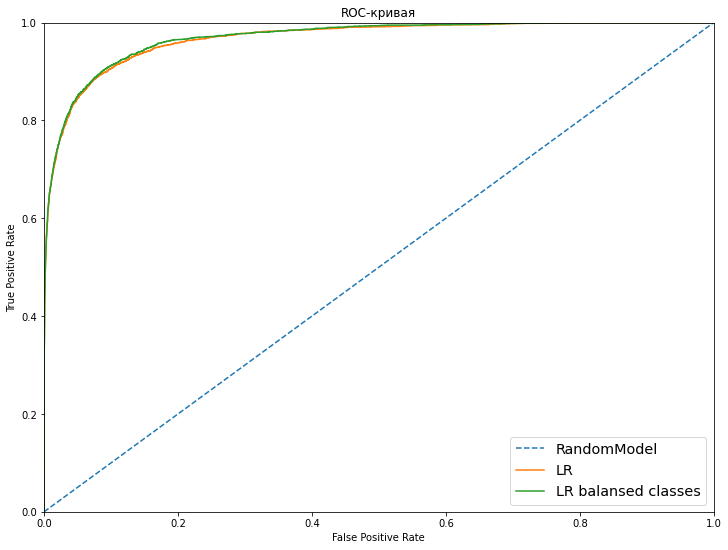

In [15]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


classificator = LogisticRegression()
classificator.fit(features_train, target_train)
probabilities_valid = classificator.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1 = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR')

classificator = LogisticRegression(class_weight=dict_classes)
classificator.fit(features_train, target_train)
probabilities_valid = classificator.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_balanced = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_balanced = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR balansed classes')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

In [16]:
index = ['LogisticRegression',
         'LR balansed classes',]
data = {'F1 на CV':[train_f1,
                    train_f1_balanced],
        'F1 на валидации':[valid_f1,
                           valid_f1_balanced
                           ],
        'AUC-ROC':[auc_roc,
                   auc_roc_balanced]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data

,F1 на CV,F1 на валидации,AUC-ROC
LogisticRegression,0.676035,0.717205,0.967331
LR balansed classes,0.740344,0.750414,0.969015


Выберем метод балансировки по весу.

### Вывод по шагу 1

В ходе преподготовки были получены признаки для обучения и разделена выборка на обучающую, валидационную и тестовую.

На тестировании оптимальными показателями F1 и AUC-ROC обладает классификатор, где учтен вес классов. В обучении мы будем использовать именно этот метод балансирования.

## Обучение

Для обучения выберем следующие модели:

1. LogisticRegression
2. DecisionTreeClassifier
3. CatBoostClassifier
4. SGDClassifier
5. LightGBM

### Классификатор LogisticRegression

In [20]:
%%time

classificator = LogisticRegression()
hyperparams = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10],
                'class_weight':[dict_classes]}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=cv_counts)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
LR_best_params = clf.best_params_
print(LR_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_LR = max(means)

# Tuning hyper-parameters for f1_score

Best parameters set found on development set:

{'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}

Grid scores on development set:

0.706063 for {'C': 0.1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}
0.706032 for {'C': 0.1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'lbfgs'}
0.705995 for {'C': 0.1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'liblinear'}
0.748232 for {'C': 1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}
0.748233 for {'C': 1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'lbfgs'}
0.748197 for {'C': 1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'liblinear'}
0.757679 for {'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}
0.757214 for {'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'lbfgs'}
0.757578 for {'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver

In [21]:
%%time

classificator = LogisticRegression()
classificator.set_params(**LR_best_params)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_LR = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_LR)
print('F1 на валидации', valid_f1_LR)

F1 на cv 0.7576794075246241
F1 на валидации 0.7568124907939314
CPU times: user 12.5 s, sys: 22 s, total: 34.6 s
Wall time: 34.6 s


### Классификатор DecisionTreeClassifier

In [22]:
%%time

classificator = DecisionTreeClassifier()
hyperparams = [{'max_depth':[x for x in range(30,51,2)],
                'random_state':[12082020],
                'class_weight':[dict_classes]}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=cv_counts)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
DTC_best_params = clf.best_params_
print(DTC_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_DTC = max(means)

# Tuning hyper-parameters for f1_score

Best parameters set found on development set:

{'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 38, 'random_state': 12082020}

Grid scores on development set:

0.611688 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 30, 'random_state': 12082020}
0.605524 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 32, 'random_state': 12082020}
0.613009 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 34, 'random_state': 12082020}
0.618822 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 36, 'random_state': 12082020}
0.622025 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 38, 'random_state': 12082020}
0.619296 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 40, 'random_state': 12082020}
0.609231 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 42, 'random_state': 12082020}
0.607058 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_dep

In [23]:
%%time

classificator = DecisionTreeClassifier()
classificator.set_params(**DTC_best_params)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_DTC = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_DTC)
print('F1 на валидации', valid_f1_DTC)

F1 на cv 0.6220246878425305
F1 на валидации 0.6046939714680166
CPU times: user 25.1 s, sys: 454 ms, total: 25.5 s
Wall time: 25.6 s


### Классификатор CatBoostClassifier

In [24]:
%%time

classificator = CatBoostClassifier(verbose=False, iterations=200)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
cv_f1_CBC = cross_val_score(classificator,
                                         features_train, 
                                         target_train, 
                                         cv=cv_counts, 
                                         scoring='f1').mean()
valid_f1_CBC = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_CBC)
print('F1 на валидации', valid_f1_CBC)

F1 на cv 0.7254646046059344
F1 на валидации 0.7419825072886298
CPU times: user 21min 29s, sys: 5min 8s, total: 26min 37s
Wall time: 26min 41s


### Классификатор SGDClassifier

In [25]:
%%time

classificator = SGDClassifier()
hyperparams = [{'loss':['hinge', 'log', 'modified_huber'],
                'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                'random_state':[12082020],
                'class_weight':[dict_classes]}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=cv_counts)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
SGDC_best_params = clf.best_params_
print(SGDC_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_SGDC = max(means)

# Tuning hyper-parameters for f1_score

Best parameters set found on development set:

{'class_weight': {0: 1, 1: 8.841344371679229}, 'eta0': 0.05, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'random_state': 12082020}

Grid scores on development set:

0.733111 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'random_state': 12082020}
0.712230 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log', 'random_state': 12082020}
0.748744 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'modified_huber', 'random_state': 12082020}
0.735467 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge', 'random_state': 12082020}
0.713277 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'random_state': 12082020}
0.75

In [26]:
%%time

classificator = SGDClassifier()
classificator.set_params(**SGDC_best_params)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_SGDC = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_SGDC)
print('F1 на валидации', valid_f1_SGDC)

F1 на cv 0.754098884359883
F1 на валидации 0.7503467406380029
CPU times: user 1.46 s, sys: 120 ms, total: 1.58 s
Wall time: 1.66 s


###  Классификатор  LightGBM

In [28]:
'''best_model = None
best_result = 0
best_est = 0
best_leaves = 0
best_rate = 0
for est in [50, 100, 500]:
    for leave in [21, 31, 41, 51]:
        for rate in [0.01, .04, 0.06, 0.3]:
            model = LGBMClassifier(random_state=12345, 
                                     n_estimators=est, 
                                     num_leaves=leave, learning_rate = rate) # инициализируем модель
            model.fit(features_train, target_train) # обучим модель на тренировочной выборке
            predictions = model.predict(features_valid)
            result = f1_score(target_valid, predictions) # посчитаем качество модели на валидационной выборке
            print(result,  "Количество деревьев:", est, "Количество листьев", leave, "Скорость обучения:", rate)
            if result > best_result:
                best_model = model
                best_result = result
                best_est = est
                best_leaves = leave
                best_rate = rate

print("F1 наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est, "Скорость обучения:", best_rate,
     "Количество листьев", best_leaves)'''

0.0 Количество деревьев: 50 Количество листьев 21 Скорость обучения: 0.01
0.6072704349653288 Количество деревьев: 50 Количество листьев 21 Скорость обучения: 0.04
0.6343359934520155 Количество деревьев: 50 Количество листьев 21 Скорость обучения: 0.06
0.753887399463807 Количество деревьев: 50 Количество листьев 21 Скорость обучения: 0.3
0.0 Количество деревьев: 50 Количество листьев 31 Скорость обучения: 0.01
0.6405520600771261 Количество деревьев: 50 Количество листьев 31 Скорость обучения: 0.04
0.6728273692489186 Количество деревьев: 50 Количество листьев 31 Скорость обучения: 0.06
0.7601268052131033 Количество деревьев: 50 Количество листьев 31 Скорость обучения: 0.3
0.0 Количество деревьев: 50 Количество листьев 41 Скорость обучения: 0.01
0.6645506843880182 Количество деревьев: 50 Количество листьев 41 Скорость обучения: 0.04
0.6909722222222222 Количество деревьев: 50 Количество листьев 41 Скорость обучения: 0.06
0.7609756097560976 Количество деревьев: 50 Количество листьев 41 Скор

In [ ]:
# F1 наилучшей модели на валидационной выборке: 0.7750085353362921 
best_result = 0.7750085353362921 
# Количество деревьев: 500 
best_est = 500
# Количество листьев 41
best_leaves= 41
# Скорость обучения: 0.06
best_rate =  0.06

In [30]:
%%time

classificator = LGBMClassifier(random_state=12345, 
                                     n_estimators=best_est, 
                                     num_leaves=best_leaves, learning_rate = best_rate)

cv_f1_LGBM = best_result

classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_LGBM = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_LGBM)
print('F1 на валидации', valid_f1_LGBM)

F1 на cv 0.7761038961038961
F1 на валидации 0.7761038961038961
CPU times: user 14min 52s, sys: 2.6 s, total: 14min 55s
Wall time: 15min 2s


Выведем таблицу валидации лучших моделей.

In [31]:
index = ['LogisticRegression',
         'DecisionTreeClassifier',
         'CatBoostClassifier',
         'SGDClassifier',
        'LightGBMClassifier']
data = {'F1 на CV':[cv_f1_LR,
                    cv_f1_DTC,
                    cv_f1_CBC,
                    cv_f1_SGDC,
                    cv_f1_LGBM],
        'F1 на валидации':[valid_f1_LR,
                           valid_f1_DTC,
                           valid_f1_CBC,
                           valid_f1_SGDC,
                           valid_f1_LGBM]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data['Выполнение задачи'] = scores_data['F1 на валидации'] > 0.75
scores_data

,F1 на CV,F1 на валидации,Выполнение задачи
LogisticRegression,0.757679,0.756812,True
DecisionTreeClassifier,0.622025,0.604694,False
CatBoostClassifier,0.725465,0.741983,False
SGDClassifier,0.754099,0.750347,True
LightGBMClassifier,0.776104,0.776104,True


### Вывод по шагу 2

К тестовому набору данных перейдут LogisticRegression, SGDClassifier и LightGBMClassifier.

## Выводы

Проведем получение F1-меры, precision, recall, accuracy и roc_auc. Так же построим графики.

Метрики LGBMClassifier
ROC AUC: 0.9648988243429129
F1: 0.7783043707214323
Precision: 0.8917940466613034
Recall: 0.6904391155403301
Accuracy: 0.9603565711415927



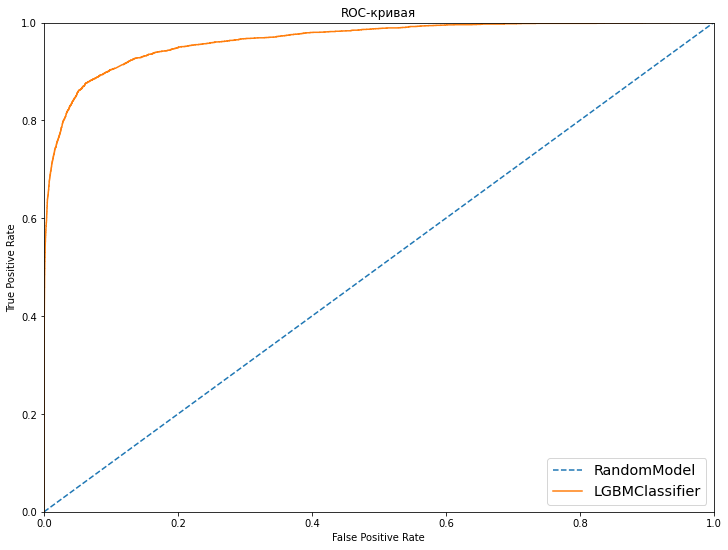

In [32]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

'''
classificator = LogisticRegression()
classificator.set_params(**LR_best_params)
classificator.fit(features_train, target_train)
probabilities_test = classificator.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = classificator.predict(features_test)
plt.plot(fpr, tpr, label='LogisticRegression')
print('Метрики LogisticRegression')
print('ROC AUC:', roc_auc_score(target_test, probabilities_one_test))
print('F1:', f1_score(target_test, predict_test))
print('Precision:', precision_score(target_test, predict_test))
print('Recall:', recall_score(target_test, predict_test))
print('Accuracy:', accuracy_score(target_test, predict_test))
print()

classificator = SGDClassifier()
classificator.set_params(**SGDC_best_params)
classificator.fit(features_train, target_train)
probabilities_test = classificator.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = classificator.predict(features_test)
plt.plot(fpr, tpr, label='SGDClassifier')
print('Метрики SGDClassifier')
print('ROC AUC:', roc_auc_score(target_test, probabilities_one_test))
print('F1:', f1_score(target_test, predict_test))
print('Precision:', precision_score(target_test, predict_test))
print('Recall:', recall_score(target_test, predict_test))
print('Accuracy:', accuracy_score(target_test, predict_test))
print()'''

# LGBM
classificator = LGBMClassifier(random_state=12345, 
                                     n_estimators=best_est, 
                                     num_leaves=best_leaves, learning_rate = best_rate)
classificator.fit(features_train, target_train)
probabilities_test = classificator.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = classificator.predict(features_test)
plt.plot(fpr, tpr, label='LGBMClassifier')
print('Метрики LGBMClassifier')
print('ROC AUC:', roc_auc_score(target_test, probabilities_one_test))
print('F1:', f1_score(target_test, predict_test))
print('Precision:', precision_score(target_test, predict_test))
print('Recall:', recall_score(target_test, predict_test))
print('Accuracy:', accuracy_score(target_test, predict_test))
print()

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Итоговый вывод

В ходе работы над проектом было сделано:

- Подготовленны данные обучения на моделях.
- Выбран способ баланса классов и поделены данные на обучающую, валидационную и тестовою выборку.
- Обучены модели и выбраны лучшие из них на валидационной выборке.
- Показаны параметры качества моделей.

Исходные данные обладают большим количеством признаков. Созданных столбцов больше, чем записей данных. Так как TF-IDF превращают текст в численные значения, лучшими моделями стали LogisticRegression, SGDClassifier и LGBMClassifier. CatBoostClassifier может показать себя очень хорошо при долгом обучении на данных. В ходе тестов данный классификатор мог обучатся до 5 часов.

На тестовой выбоке по метрике F1 лучше всего себя показал LGBMClassifier всего на 0.77.
Данная модель обладает больними показателями Precision и Accuracy. Это говорит нам, что токсичные комментарии находятся лучше.